In [1]:
import pandas as pd

import numpy as np


def load_data(path):
    gp99_mx = np.load(path)
    rebalance_sheet = pd.DataFrame(gp99_mx)
    rebalance_sheet.rename(columns={0: 'date'}, inplace=True)
    rebalance_sheet['format_date'] = rebalance_sheet['date'].apply(
        lambda x: x.split('.')[0] + x.split('.')[1].replace('0_', '').zfill(2) + x.split('.')[2].replace('0_',
                                                                                                         '').zfill(2))
    rebalance_sheet['format_date'] = pd.to_datetime(rebalance_sheet['format_date'])
    rebalance_sheet.drop('date', axis=1, inplace=True)
    rebalance_sheet.set_index('format_date', inplace=True)
    for col in rebalance_sheet.columns:
        rebalance_sheet[col] = rebalance_sheet[col].apply(lambda x: str(int(float(x))).zfill(6))
    return rebalance_sheet


gp99_mx = load_data(r'C:\Users\Zijin\Desktop\PYs\工作\股票回测\50gp.npy')
gp99_mx



,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
format_date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,900945,002001,603528,002508,603810,300124,603590,603317,000672,600655,...,002099,603386,002714,000032,900928,600689,601858,002422,600177,300363
2020-01-03,603966,600530,600222,002252,603918,603067,603776,300726,601330,600075,...,603613,600588,600178,300682,002010,603161,603080,600681,603767,601858
2020-01-06,600782,000591,600774,603586,603999,603528,603613,600340,600623,603299,...,600050,603998,002408,600560,600322,603010,600722,600070,002202,300682
2020-01-07,000581,300726,600850,600863,600586,600657,603083,600469,601577,600461,...,601588,002010,601117,600008,600016,002531,002191,603590,603737,600887
2020-01-09,603991,001872,600468,600829,600203,000582,002714,600618,603013,000739,...,300741,600560,600336,600329,603269,603966,603639,600315,601117,300244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-10,600539,002146,688456,600577,600693,688798,600113,000733,603187,600794,...,600638,688636,000768,603787,603682,601908,605008,688711,603707,603599
2023-07-11,600234,600011,688685,688067,688776,601798,600108,605286,002004,601200,...,600861,601108,603903,603599,601117,002299,603637,603359,600496,600985
2023-07-13,603882,300408,600082,688501,000988,605151,605378,688151,688210,603380,...,605008,002202,688607,300433,600751,605069,603068,002690,600233,300661


In [27]:
unique_codes = list(set(gp99_mx.values.flatten().tolist()))
len(unique_codes)
def filter_codes(stock_codes):
    # 仅保留以0, 3, 6开头的代码
    return [code for code in stock_codes if code.startswith(("0", "3", "6"))]

start_date = gp99_mx.index.tolist()[0].strftime('%Y-%m-%d')
end_date   = gp99_mx.index.tolist()[-1].strftime('%Y-%m-%d')

filtered_codes = filter_codes(unique_codes)
filtered_codes

['603819',
 '603208',
 '688118',
 '603038',
 '601208',
 '000733',
 '603829',
 '601222',
 '600586',
 '600743',
 '603838',
 '600268',
 '688328',
 '600998',
 '000636',
 '688699',
 '688211',
 '600103',
 '688550',
 '600199',
 '600814',
 '600792',
 '600410',
 '603916',
 '688636',
 '601009',
 '600193',
 '600961',
 '002430',
 '002273',
 '002939',
 '603810',
 '603686',
 '600736',
 '002372',
 '600114',
 '603311',
 '002585',
 '601218',
 '603228',
 '688389',
 '600628',
 '603536',
 '603908',
 '600307',
 '301219',
 '688002',
 '688266',
 '600070',
 '600658',
 '002151',
 '000591',
 '605333',
 '688111',
 '603721',
 '002191',
 '600255',
 '601162',
 '605189',
 '600188',
 '603313',
 '600757',
 '688148',
 '605117',
 '603078',
 '300482',
 '000063',
 '000027',
 '600071',
 '600030',
 '600067',
 '002714',
 '002185',
 '002831',
 '600159',
 '600725',
 '688135',
 '688350',
 '600686',
 '605598',
 '000800',
 '688233',
 '600975',
 '688003',
 '688311',
 '600716',
 '605018',
 '601658',
 '603037',
 '688056',
 '603507',

In [28]:
all_market_data = pd.read_csv(r'C:\Users\Zijin\Desktop\PYs\工作\股票回测\回测12\all_market_data.csv', index_col=0, )

all_market_data.columns = [col.split('.')[0] if '.' in col else col for col in all_market_data.columns]

all_market_data

,thscode,open,high,low,close,volume,thscode,open,high,low,...,high,low,close,volume,thscode,open,high,low,close,volume
time,,,,,,,,,,,,,,,,,,,,,
2020-01-02,603118.SH,26.995915,27.469528,26.688067,27.351125,4.540639e+07,601069.SH,15.111829,15.393541,15.061523,...,42.328671,41.729680,42.129007,2.954441e+08,600251.SH,46.825803,47.680289,46.569458,47.253046,6.768099e+07
2020-01-03,603118.SH,27.422167,28.014182,27.280083,27.493208,4.060138e+07,601069.SH,15.423724,16.017331,15.393541,...,42.528334,41.929344,42.328671,2.229854e+08,600251.SH,47.338494,50.072848,47.082149,49.047465,1.657992e+08
2020-01-06,603118.SH,27.469528,29.056130,27.232722,28.606198,8.551093e+07,601069.SH,16.610939,17.264913,16.299043,...,42.727998,41.929344,42.328671,2.734632e+08,600251.SH,48.962017,49.731054,48.278428,48.962017,1.200883e+08
2020-01-07,603118.SH,28.511475,30.145439,28.464114,29.955994,9.322768e+07,601069.SH,16.409716,16.560633,16.248738,...,42.927661,42.129007,42.727998,2.716143e+08,600251.SH,49.645605,49.645605,48.449326,48.791120,6.916466e+07
2020-01-08,603118.SH,29.363978,29.790229,28.795643,28.819324,7.674130e+07,601069.SH,17.164301,17.617052,16.590816,...,42.727998,41.929344,41.929344,3.097900e+08,600251.SH,48.534774,49.389260,48.107531,48.192980,8.992109e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-13,603118.SH,32.742400,34.729074,31.811932,34.678778,1.218049e+08,601069.SH,13.638963,13.781460,13.557537,...,55.066400,54.507350,55.066400,1.491383e+08,600251.SH,84.688705,87.063154,83.985164,85.744016,2.970680e+08
2023-07-14,603118.SH,34.402153,36.916930,34.125527,35.106290,1.456816e+08,601069.SH,13.537180,13.822173,13.496467,...,55.066400,54.786875,55.066400,9.325464e+07,600251.SH,85.568131,86.095786,83.985164,84.688705,1.690494e+08
2023-07-17,603118.SH,35.055995,35.081143,33.446537,33.672867,7.828557e+07,601069.SH,13.547358,13.761103,13.465932,...,55.066400,54.507350,54.786875,9.937330e+07,600251.SH,84.424877,85.744016,83.721336,85.304303,1.096008e+08


In [29]:
rebalance_date = {}
for date, row in gp99_mx.iterrows():
    pool = row.tolist()


    size = len(row.tolist())
    weight = {code:1/size for code in pool}
    rebalance_date[date.strftime('%Y%m%d')] = weight
rebalance_date


{'20200102': {'900945': 0.02,
  '002001': 0.02,
  '603528': 0.02,
  '002508': 0.02,
  '603810': 0.02,
  '300124': 0.02,
  '603590': 0.02,
  '603317': 0.02,
  '000672': 0.02,
  '600655': 0.02,
  '601038': 0.02,
  '603708': 0.02,
  '600877': 0.02,
  '002153': 0.02,
  '600389': 0.02,
  '600153': 0.02,
  '600815': 0.02,
  '600855': 0.02,
  '600428': 0.02,
  '300726': 0.02,
  '603043': 0.02,
  '600050': 0.02,
  '600461': 0.02,
  '600728': 0.02,
  '603165': 0.02,
  '600300': 0.02,
  '601117': 0.02,
  '600130': 0.02,
  '603728': 0.02,
  '603239': 0.02,
  '603918': 0.02,
  '603387': 0.02,
  '603369': 0.02,
  '000963': 0.02,
  '600735': 0.02,
  '600622': 0.02,
  '600887': 0.02,
  '603650': 0.02,
  '600679': 0.02,
  '600026': 0.02,
  '002099': 0.02,
  '603386': 0.02,
  '002714': 0.02,
  '000032': 0.02,
  '900928': 0.02,
  '600689': 0.02,
  '601858': 0.02,
  '002422': 0.02,
  '600177': 0.02,
  '300363': 0.02},
 '20200103': {'603966': 0.02,
  '600530': 0.02,
  '600222': 0.02,
  '002252': 0.02,
  '

In [30]:

hs300 = pd.read_csv(r'C:\Users\Zijin\Desktop\PYs\稳定版\hs300.csv')
hs300 = hs300[['time', 'open', 'high', 'low', 'close']]

benchmark_code = 'hs300'

if benchmark_code == 'hs300' or benchmark_code == '沪深300':
    bm = hs300[['time', 'open', 'high', 'low', 'close', ]]
else:
    bm = hs300[['time', 'open', 'high', 'low', 'close', ]]
bm.time=pd.to_datetime(bm.time.astype(str))
bm.sort_values('time', inplace=True)
bm = bm[(bm.time>=start_date) & (bm.time<=end_date)]



import backtrader as bt

class RebalancePortfolioStrategy(bt.Strategy):
    params = {
        'pos_per': 0.95,
        'signal_dates': None,
        'output': None

    }

    def __init__(self):
        self.bm = self.data
        self.fund_datas = self.datas[1:]

    # 日志函数
    def log(self, txt, dt=None):
        '''日志函数'''
        dt = dt or self.datas[0].datetime.date(0)
        if self.p.output:
            with self.p.output:
                print('%s, %s' % (dt.isoformat(), txt))
        print('%s, %s' % (dt.isoformat(), txt))

    def next(self):
        today = self.datetime.date(0)

        today_str = today.strftime('%Y%m%d')

        print(today, self.broker.getvalue())


        if today_str in self.p.signal_dates:
            # self.log(f'{today} 准备调仓')
            current_value = round(self.broker.getvalue(), 0)  # 当前的账户总市值，包括现金和股票

            holdings = [stock for stock in self.broker.positions if self.broker.getposition(stock).size > 0]  # 当前的多头持仓
            for stock in holdings:
                self.close(data=stock)

            to_buy_dict = self.p.signal_dates[today_str]
            # self.log(to_buy_dict)
            for fund_code in to_buy_dict:
                try:
                    data_to_buy = self.getdatabyname(fund_code)
                    # self.log(f'创建买单:{fund_code}')
                    weight = to_buy_dict[fund_code]
                    size = int(current_value * weight * self.p.pos_per  / data_to_buy.close // 100 * 100)
                    self.buy(data=data_to_buy, size=size)
                except:
                    self.log(f'！！！！！！！！！！！！！！！！{fund_code} 没有该时间段的行情数据，直接跳过')

添加策略
初始市值: 10000000.00
2020-01-02 10000000.0
2020-01-02, ！！！！！！！！！！！！！！！！900945 没有该时间段的行情数据，直接跳过
2020-01-02, ！！！！！！！！！！！！！！！！900928 没有该时间段的行情数据，直接跳过
2020-01-03 10031305.166173082
2020-01-03, ！！！！！！！！！！！！！！！！900922 没有该时间段的行情数据，直接跳过
2020-01-03, ！！！！！！！！！！！！！！！！900915 没有该时间段的行情数据，直接跳过
2020-01-06 10116297.240497176
2020-01-06, ！！！！！！！！！！！！！！！！900905 没有该时间段的行情数据，直接跳过
2020-01-07 10246338.640045343
2020-01-08 10167481.55146247
2020-01-09 10290710.11186439
2020-01-10 10290051.406634139
2020-01-13 10413882.055263415
2020-01-13, ！！！！！！！！！！！！！！！！900911 没有该时间段的行情数据，直接跳过
2020-01-14 10375104.011498706
2020-01-15 10407660.222252306
2020-01-16 10400528.081774436
2020-01-17 10384791.363818469
2020-01-20 10494832.221893854
2020-01-21 10425680.134168727
2020-01-22 10476147.369723508
2020-01-23 10185753.671566023
2020-02-03 9275885.637558732
2020-02-04 9445542.187543469
2020-02-05 9657487.970757717
2020-02-06 9930125.464322647
2020-02-07 10114303.443644503
2020-02-10 10272477.517729532
2020-02-11 10263616

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2020-01-03   2020-01-03
End Period                 2023-07-19   2023-07-19
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          -6.62%       109.25%
CAGR﹪                     -1.33%       15.48%

Sharpe                     0.0          1.25
Prob. Sharpe Ratio         50.37%       98.67%
Smart Sharpe               0.0          1.2
Sortino                    0.01         1.75
Smart Sortino              0.01         1.67
Sortino/√2                 0.0          1.23
Smart Sortino/√2           0.0          1.18
Omega                      1.24         1.24

Max Drawdown               -40.82%      -17.81%
Longest DD Days            881          320
Volatility (ann.)          20.5%        18.84%
R^2                        0.06         0.06
Information Ratio          0.06         0.06
Calmar             

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2022-01-13,2022-04-26,2022-11-28,320,-17.810345,-15.822337
2,2020-01-21,2020-02-03,2020-02-11,22,-11.614732,-9.998159
3,2021-09-14,2021-10-28,2022-01-11,120,-10.519476,-10.036429
4,2020-08-07,2020-10-30,2021-02-26,204,-10.185001,-9.974704
5,2020-02-26,2020-03-23,2020-06-29,125,-9.413267,-9.088023


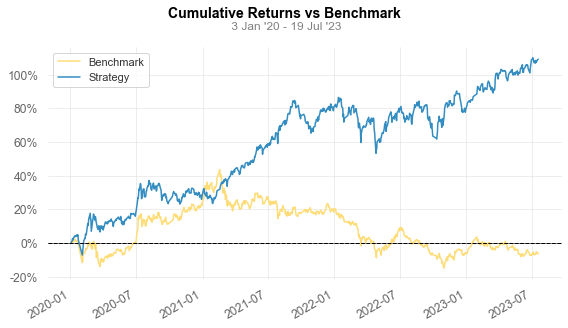

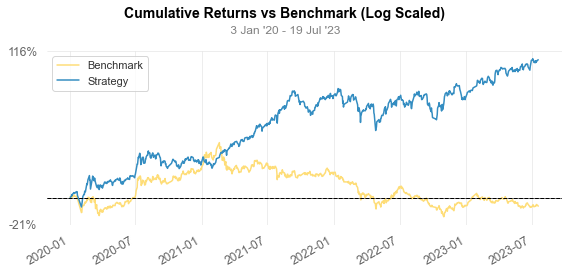

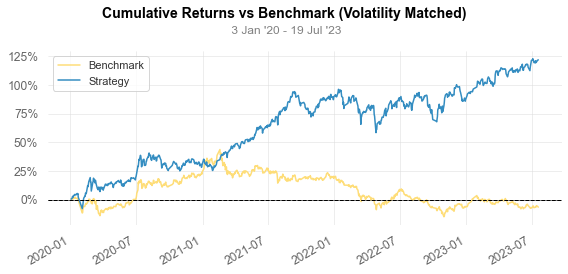

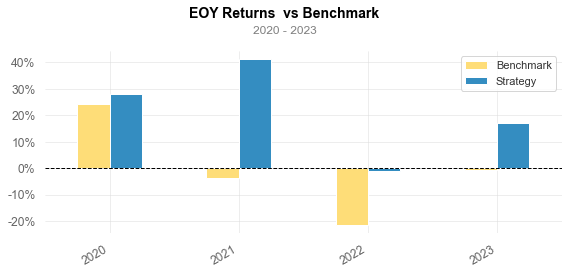

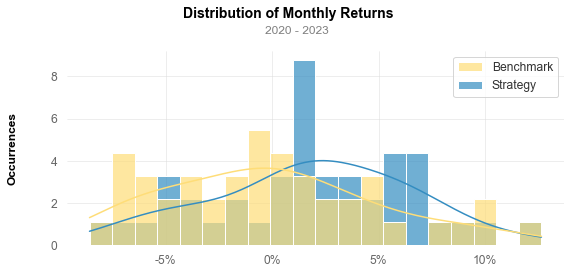

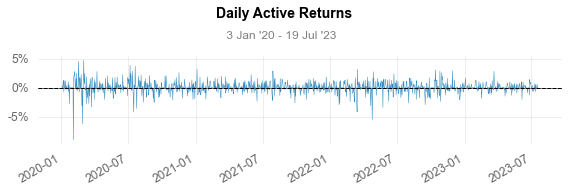

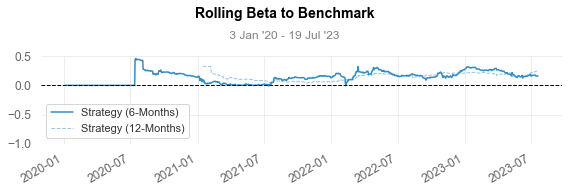

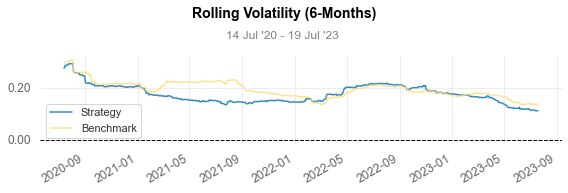

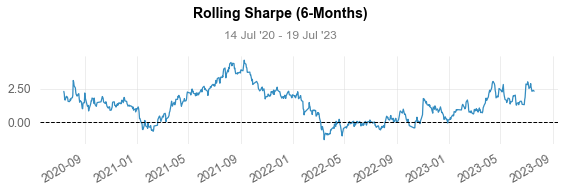

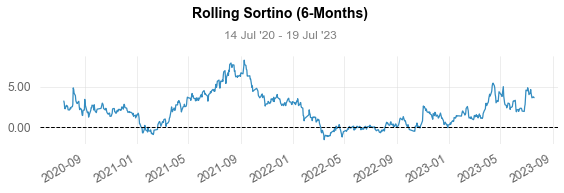

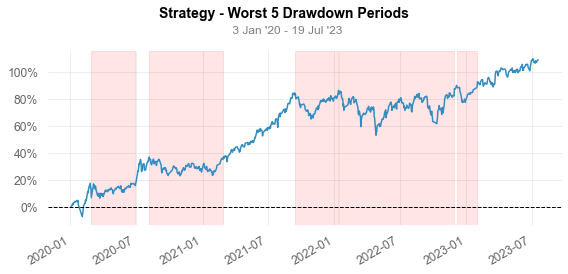

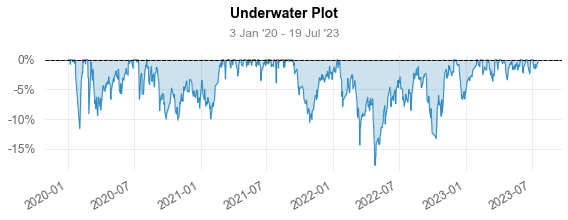

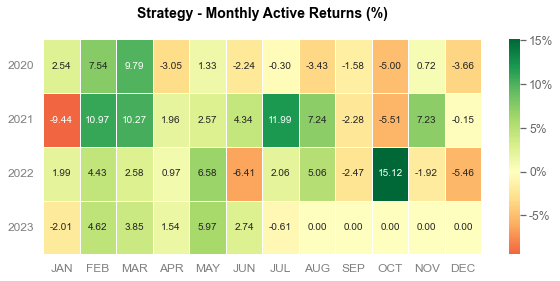

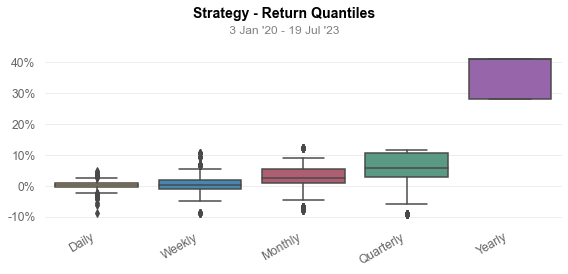

In [31]:
from backtrader.feeds import PandasData
from datetime import datetime as dt

cerebro = bt.Cerebro(stdstats=False)

# start_date = '20200102'
# end_date = '20230719'
start_cash = 10_000_000

col_index = [(s, s + 6) for s in range(0, all_market_data.shape[1], 6)]
for s, e in col_index[:]:
    sub_data = all_market_data.iloc[:, s:e]
    sub_data.sort_index(inplace=True)
    sub_data.reset_index(inplace=True)
    sub_data.time = pd.to_datetime(sub_data.time)
    code = sub_data.thscode.tolist()[0]

    sub_data = sub_data[['time', 'open', 'high', 'low', 'close', 'volume']]
    # print(sub_data)
    last_data = sub_data.copy()
    sub_data = PandasData(
        dataname=sub_data,
        datetime=0,
        open=1,
        high=2,
        low=3,
        close=4,
        volume=5,
        fromdate=dt.strptime(start_date, '%Y-%m-%d'),  # 起始日  dt.strptime(start, '%Y%m%d')
        todate=dt.strptime(end_date, '%Y-%m-%d')
    )
    cerebro.adddata(sub_data, name=code.split('.')[0])

print('添加策略')
cerebro.addstrategy(RebalancePortfolioStrategy, **{'signal_dates': rebalance_date})
cerebro.broker.setcash(start_cash)
cerebro.addanalyzer(bt.analyzers.PyFolio, _name='PyFolio')
cerebro.broker.set_checksubmit(False)
cerebro.broker.set_coc(True)
print('初始市值: %.2f' % cerebro.broker.getvalue())
results = cerebro.run()
strat = results[0]

portfolio_stats = strat.analyzers.getbyname('PyFolio')
returns, _, _, _ = portfolio_stats.get_pf_items()

returns.index = returns.index.tz_convert(None)
print('最终市值: %.2f' % cerebro.broker.getvalue())

bm.set_index('time', inplace=True)
bm.rename(columns={'close': 'price'}, inplace=True)

report_mode = 'full'
#
import quantstats as qs

if report_mode == 'basic':
    qs.reports.basic(returns, benchmark=bm)
elif report_mode == 'full':
    qs.reports.full(returns, benchmark=bm)
elif report_mode == 'simple':
    qs.plots.snapshot(returns, title='Performance')
qs.reports.html(returns, benchmark=bm, output='AI策略回测报告.html',
                download_filename=r'C:\Users\Zijin\Desktop\PYs\工作\股票回测\AI策略回测报告.html',
                title='AI策略回测报告_20200102_20230719')

returns.to_frame('ai_strategy_ret').to_csv(r'C:\Users\Zijin\Desktop\PYs\工作\股票回测\ai_strategy_ret.csv')
